<a href="https://colab.research.google.com/github/Ozoemenamsolomon/Brighto/blob/main/first_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first ML projrct
[Link](https://www.youtube.com/watch?v=6-YFvPYOf4Y&list=PLQY2H8rRoyvwmodeNmu0jLIPDNlDXGeF-&index=7) to video tutorial


## Installations

In [6]:
pip install pandas
pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data source

In [42]:
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

## Imports

In [34]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

## Functions

In [30]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

## Logics pd

In [43]:
df=pd.read_csv("/tmp/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [44]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [45]:
df.groupby(["species"]).count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,152,151,151,151,151,146,152
Chinstrap,68,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119,124


In [46]:
df.groupby(["species"]).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


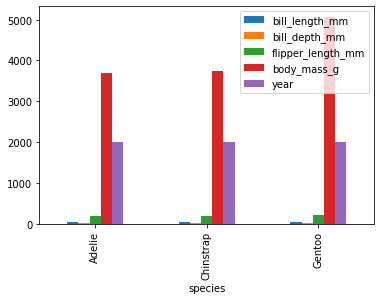

In [47]:
df.groupby("species").mean().plot(kind="bar")

In [48]:
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [50]:
df_clean=df.dropna()

In [51]:
df_clean=df_clean.drop(columns=["year"])

In [52]:
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [53]:
df=df_clean

In [54]:
label = "species"

classes= df[label].unique().tolist()

df[label] = df[label].map(classes.index)

classes

['Adelie', 'Gentoo', 'Chinstrap']

In [55]:
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd),len(test_ds_pd)))

223 examples in training, 110 examples for testing.


## Logic tensorflow

In [35]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd,label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd,label=label)

In [40]:
model_l= tfdf.keras.RandomForestModel(verbose=1)

model_l.fit(x=train_ds)

Use /tmp/tmpeuaus7n_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.162406. Found 224 examples.
Training model...
Model trained in 0:00:00.060949
Compiling model...
Model compiled.


In [41]:
model_l.compile(metrics=["accuracy"])
evaluation = model_l.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 125ms/step - loss: 0.0000e+00 - accuracy: 0.9541
loss: 0.0000
accuracy: 0.9541


In [56]:
tfdf.model_plotter.plot_model_in_colab(model_l, tree_idx=0,max_depth=5)

## Test